<a href="https://colab.research.google.com/github/Hareni1103/firstproject/blob/main/avgtimespentonsocialmedia_kaggle.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [33]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [9]:
df=pd.read_csv("/content/dummy_data.csv")
df

,age,gender,time_spent,platform,interests,location,demographics,profession,income,indebt,isHomeOwner,Owns_Car
0,56,male,3,Instagram,Sports,United Kingdom,Urban,Software Engineer,19774,True,False,False
1,46,female,2,Facebook,Travel,United Kingdom,Urban,Student,10564,True,True,True
2,32,male,8,Instagram,Sports,Australia,Sub_Urban,Marketer Manager,13258,False,False,False
3,60,non-binary,5,Instagram,Travel,United Kingdom,Urban,Student,12500,False,True,False
4,25,male,1,Instagram,Lifestlye,Australia,Urban,Software Engineer,14566,False,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...
995,22,female,8,Instagram,Lifestlye,United Kingdom,Rural,Marketer Manager,18536,False,True,False
996,40,non-binary,6,YouTube,Travel,United Kingdom,Rural,Software Engineer,12711,True,False,False
997,27,non-binary,5,YouTube,Travel,United Kingdom,Rural,Student,17595,True,False,True
998,61,female,4,YouTube,Sports,Australia,Sub_Urban,Marketer Manager,16273,True,True,False


In [10]:
df.shape

(1000, 12)

In [11]:
df.head(5)

,age,gender,time_spent,platform,interests,location,demographics,profession,income,indebt,isHomeOwner,Owns_Car
0,56,male,3,Instagram,Sports,United Kingdom,Urban,Software Engineer,19774,True,False,False
1,46,female,2,Facebook,Travel,United Kingdom,Urban,Student,10564,True,True,True
2,32,male,8,Instagram,Sports,Australia,Sub_Urban,Marketer Manager,13258,False,False,False
3,60,non-binary,5,Instagram,Travel,United Kingdom,Urban,Student,12500,False,True,False
4,25,male,1,Instagram,Lifestlye,Australia,Urban,Software Engineer,14566,False,True,True


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   age           1000 non-null   int64 
 1   gender        1000 non-null   object
 2   time_spent    1000 non-null   int64 
 3   platform      1000 non-null   object
 4   interests     1000 non-null   object
 5   location      1000 non-null   object
 6   demographics  1000 non-null   object
 7   profession    1000 non-null   object
 8   income        1000 non-null   int64 
 9   indebt        1000 non-null   bool  
 10  isHomeOwner   1000 non-null   bool  
 11  Owns_Car      1000 non-null   bool  
dtypes: bool(3), int64(3), object(6)
memory usage: 73.4+ KB


In [8]:
df.describe()

,age,time_spent,income
count,1000.000000,1000.000000,1000.000000
mean,40.986000,5.029000,15014.823000
std,13.497852,2.537834,2958.628221
min,18.000000,1.000000,10012.000000
25%,29.000000,3.000000,12402.250000
50%,42.000000,5.000000,14904.500000
75%,52.000000,7.000000,17674.250000
max,64.000000,9.000000,19980.000000


In [5]:
df.isnull().sum()

age             0
gender          0
time_spent      0
platform        0
interests       0
location        0
demographics    0
profession      0
income          0
indebt          0
isHomeOwner     0
Owns_Car        0
dtype: int64

In [6]:
df.duplicated().sum()

0

In [13]:
df.corr()

<ipython-input-13-2f6f6606aa2c>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,age,time_spent,income,indebt,isHomeOwner,Owns_Car
age,1.000000,-0.033827,-0.087391,-0.017055,-0.005321,0.006921
time_spent,-0.033827,1.000000,0.004757,0.013079,0.029388,-0.020271
income,-0.087391,0.004757,1.000000,0.037860,0.006072,0.019789
indebt,-0.017055,0.013079,0.037860,1.000000,0.038102,-0.035641
isHomeOwner,-0.005321,0.029388,0.006072,0.038102,1.000000,-0.051411
Owns_Car,0.006921,-0.020271,0.019789,-0.035641,-0.051411,1.000000


In [15]:
df.columns

Index(['age', 'gender', 'time_spent', 'platform', 'interests', 'location',
       'demographics', 'profession', 'income', 'indebt', 'isHomeOwner',
       'Owns_Car'],
      dtype='object')

In [32]:
for column in df.columns:
    if df[column].dtype == 'object' or df[column].dtype == 'bool':
        unique_values = df[column].unique()
        print(f"Unique values in column '{column}': {unique_values}")

Unique values in column 'gender': ['male' 'female' 'non-binary']
Unique values in column 'platform': ['Instagram' 'Facebook' 'YouTube']
Unique values in column 'interests': ['Sports' 'Travel' 'Lifestlye']
Unique values in column 'location': ['United Kingdom' 'Australia' 'United States']
Unique values in column 'demographics': ['Urban' 'Sub_Urban' 'Rural']
Unique values in column 'profession': ['Software Engineer' 'Student' 'Marketer Manager']


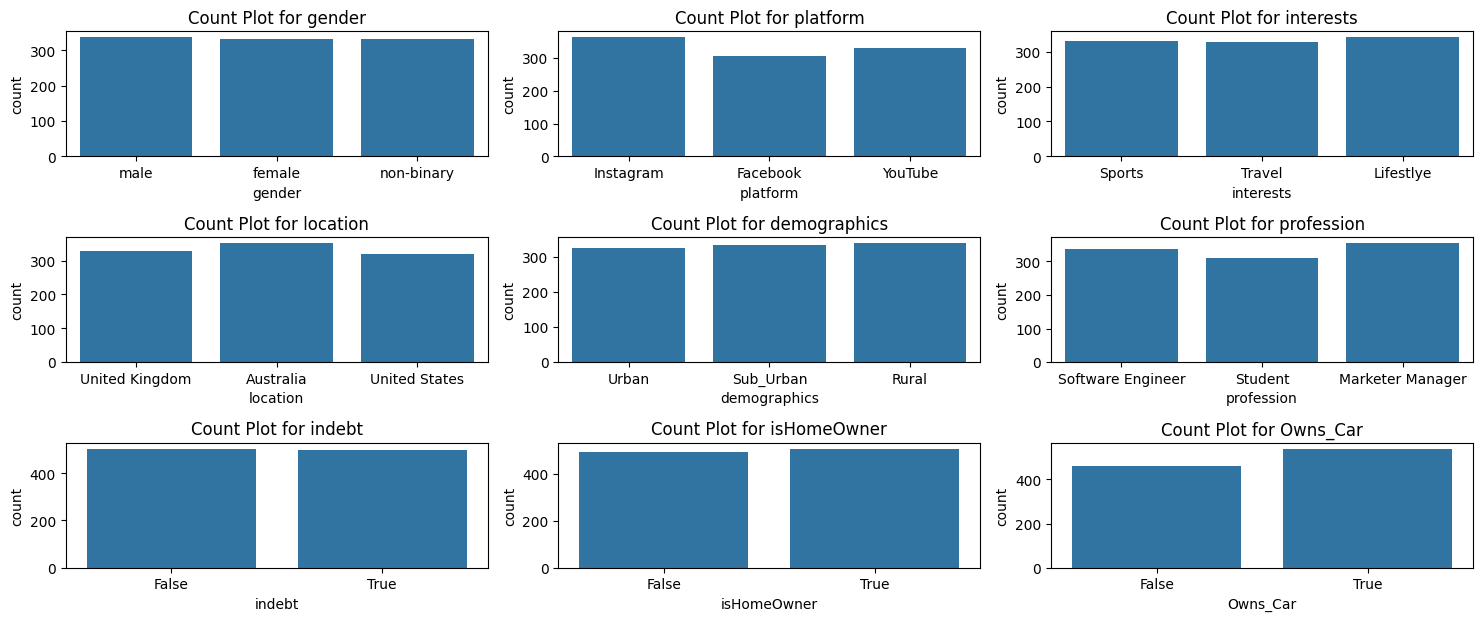

In [43]:
categorical_columns = [column for column in df.columns if df[column].dtype == 'object' or df[column].dtype == 'bool']

plt.figure(figsize=(15, 10))
for i, column in enumerate(categorical_columns, 1):
    plt.subplot(5, 3, i)
    sns.countplot(data=df, x=column)
    plt.title(f'Count Plot for {column}')

plt.tight_layout()
plt.show()

**From this visualization it seems that all gender spends their time on social media as equally, comparing to youtube ,facebook the spending time on instagram seems to be high. the persons in the position of market managers were spending more time on social media than students and software engineer this represents that they are spending their time on social media for their work purpose to understand people and do marketing as customer needs.**

Text(0.5, 1.0, 'profession based on income')

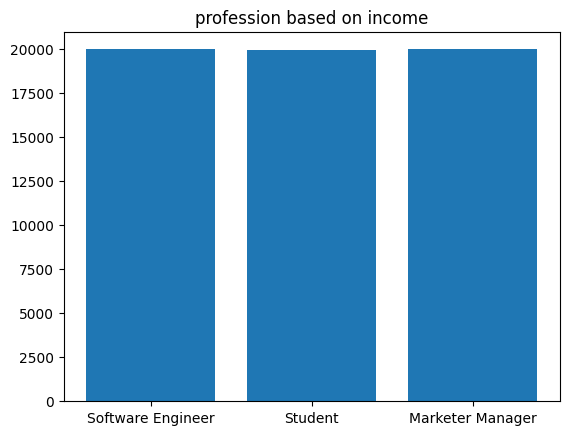

In [46]:
plt.bar(x=df["profession"],height=df["income"])
plt.title("profession based on income")

**From this visualization the professions belongs to "software engineer","student","Market Manager" were all earning from the social media in equal range. This helps us to understand that professionals in anyfield can earn salary in social media**

Text(0.5, 1.0, 'time spent based on age')

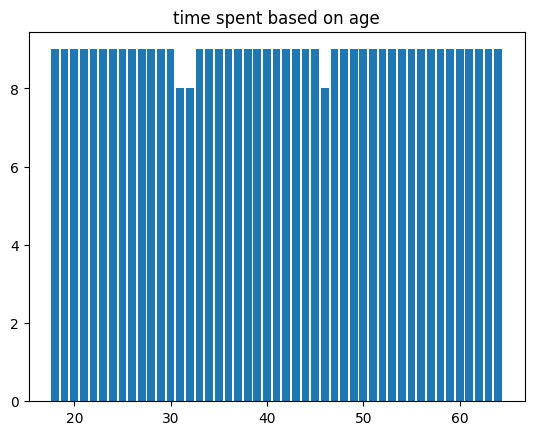

In [48]:
plt.bar(x=df["age"],height=df["time_spent"])
plt.title("time spent based on age")

**From this we came to know that the persons from the age between 20 to 60 were spending more than 6 hours in their mobile phones.**